In [3]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
import math

In [4]:
def get_filter_size(sigma):
    s = (2 * math.ceil(3*sigma)) + 1
    return s

In [127]:
def calculate_log(x, y, sigma):
    scale_factor = 500
    return (-1/(math.pi*(sigma**4))) * (1 - ( ((x**2)+(y**2))/(2*(sigma**2)) ) ) * (math.e**(-1 * ((x**2)+(y**2)) / (2*(sigma**2)) ))

In [71]:
def calculate_filter(sigma):
    size = get_filter_size(sigma)
    log_filter = np.zeros((size,size))
    
    center_x = math.floor(size / 2)
    center_y = math.floor(size / 2)
    
    for i in range(size):
        for j in range(size):
            distance_x = abs(center_x - j)
            distance_y = abs(center_y - i)
            log_filter[i][j] = calculate_log(distance_x,distance_y,sigma)
            
    return log_filter, size

In [134]:
def detect_edge(img, sigma, threshold):
    result_img_log = np.zeros(img.shape)
    result_img = np.zeros(img.shape)
    
    log_filter, size = calculate_filter(sigma)
    
    center_x = math.floor(size / 2)
    center_y = math.floor(size / 2)
    
    # Apply "log_filter" on "original_img" in some way
    # and put the values in "img"
    
    for i in range (0,len(img[:,1])):
        for j in range (0,len(img[1,:])):
            value = 0
            for x in range (0,len(log_filter[:,1])):
                for y in range (0,len(log_filter[1,:])):
                    distance_x = y - center_x
                    distance_y = x - center_y
                    if not (j+distance_x > len(img[1,:]) - 1 or j+distance_x < 0 or i+distance_y > len(img[:,1]) - 1 or i+distance_y < 0):
                        value += (img[i+distance_y][j+distance_x] * log_filter[x][y])
                            
            result_img_log[i][j] = value
    
    result_img_log = ((result_img_log - np.min(result_img_log)) / np.max(result_img_log))

    for i in range (13,img.shape[0] - 13):
        for j in range (13,img.shape[1] - 13):
            p1 = 0
            p2 = 0
            p3 = 0
            p4 = 0
            p5 = 0
            p6 = 0
            p7 = 0
            p8 = 0
            p9 = 0
            
            p1 = result_img_log[i-1][j-1]
            p2 = result_img_log[i-1][j]
            p3 = result_img_log[i-1][j+1]
            p4 = result_img_log[i][j-1]
            
            p5 = result_img_log[i][j]
            
            p6 = result_img_log[i][j+1]
            p7 = result_img_log[i+1][j-1]
            p8 = result_img_log[i+1][j]
            p9 = result_img_log[i+1][j+1]

            y_prewitt = (p1+p2+p3 -p7-p8-p9)
            x_prewitt = (0-p1-p4-p7 +p3+p6+p9)
            prewitt = math.sqrt((y_prewitt**2) + (x_prewitt**2))

            value = 0

            # print(prewitt)
            if prewitt > threshold:
                value = 255
            else:
                value = 0

            result_img[i][j] = value

    return result_img


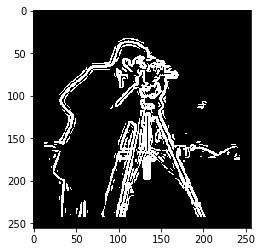

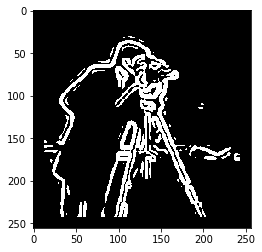

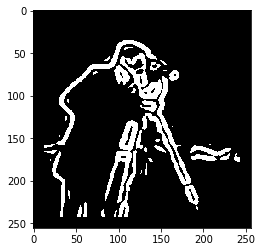

In [146]:
img = Image.open("Cameraman.tif")

threshold = 0.75

img_np = np.array(img, dtype='int32')
img_result = detect_edge(img_np, 2, threshold)
plt.figure()
plt.imsave("LoG_2.jpg", img_result, cmap='gray')
plt.imshow(img_result, cmap="gray")

img_np = np.array(img, dtype='int32')
img_result = detect_edge(img_np, 3, threshold)
plt.figure()
plt.imsave("LoG_3.jpg", img_result, cmap='gray')
plt.imshow(img_result, cmap="gray")

img_np = np.array(img, dtype='int32')
img_result = detect_edge(img_np, 4, threshold)
plt.figure()
plt.imsave("LoG_4.jpg", img_result, cmap='gray')
plt.imshow(img_result, cmap="gray")